In [2]:
import matplotlib
import numpy as np
import scipy as sp
from scipy import signal
from scipy import misc
import math
import matplotlib.pyplot as plt
import cv2
%matplotlib inline  

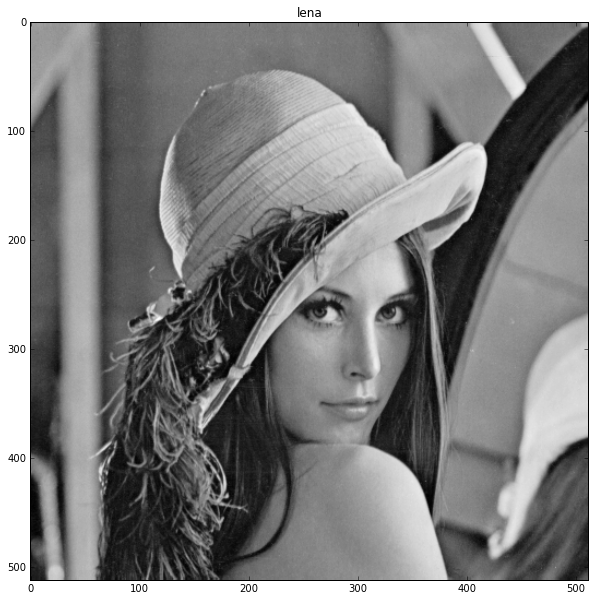

In [3]:
img_bgr = cv2.imread('lena.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY).astype('float32')
img_rgb = img_rgb/255.0

plt.figure(figsize=(10,10))
plt.imshow(img_rgb, cmap='gray')
plt.title('lena')
plt.show()

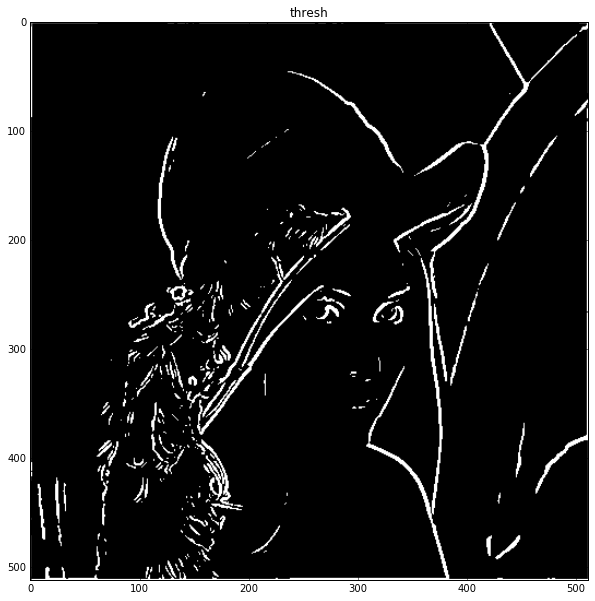

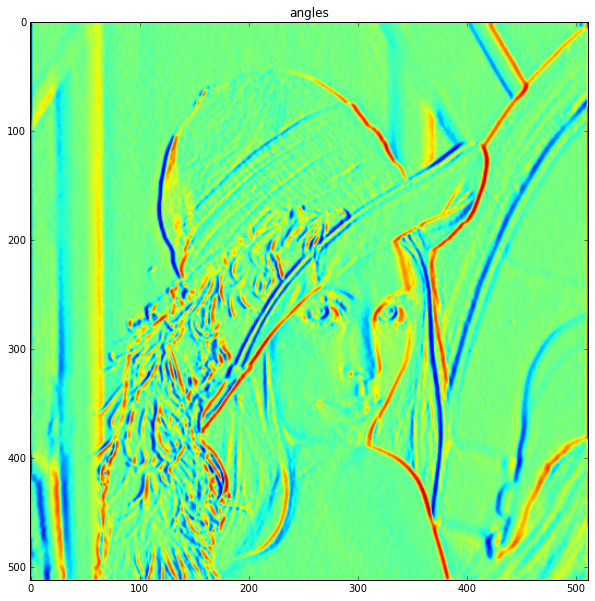

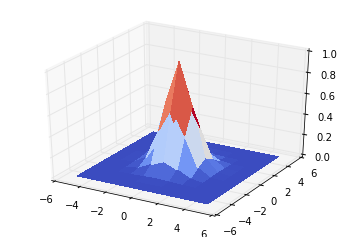

In [4]:
# Evaluates 2D Gaussian on xy grid.
# xy is two channel 2D matrix.  The first channel stores x coordinates
# [-1 0 1]
# [-1 0 1]
# [-1 0 1]
# and the second channel stores y coordinates
# [-1 -1 -1]
# [0   0  0]
# [1   1  1]
# So then we can pick out an xy value using xy[i,j,:].
# Check out gaussian2_n() to see how you can construct such
# an xy using numpy
#
# For gaussian2_xy() and gaussian2_n() methods
# mean is a 2x1 vector and cov is a 2x2 matrix

def gaussian2_xy(mean, cov, xy):
    invcov = np.linalg.inv(cov)
    results = np.ones([xy.shape[0], xy.shape[1]])
    for x in range(0, xy.shape[0]):
        for y in range(0, xy.shape[1]):
            v = xy[x,y,:].reshape(2,1) - mean
            results[x,y] = np.dot(np.dot(np.transpose(v), invcov), v)
    results = np.exp( - results / 2 )
    return results 

def gaussian2_n(mean, cov, n):
    s = int(n/2)
    x = np.linspace(-s,s,n)
    y = np.linspace(-s,s,n)
    xc, yc = np.meshgrid(x, y)
    xy = np.zeros([n, n, 2])
    xy[:,:,0] = xc
    xy[:,:,1] = yc

    return gaussian2_xy(mean, cov, xy), xc, yc

n = 111
mean =  np.array([0, 0])
mean = mean.reshape(2,1)
cov = np.array([[1,0],[0,1]])
g2d_kernel, xc, yc = gaussian2_n(mean, cov, 11)

blurImg = signal.convolve2d(img_rgb, g2d_kernel, mode='same', boundary='fill')
dx_kernel = np.array([[-1,0,1]])
dx = signal.convolve2d(blurImg, dx_kernel, mode='same', boundary='fill')

dy_kernel = np.array([[-1],[0],[1]])
dy = signal.convolve2d(blurImg, dy_kernel, mode='same', boundary='fill')

img_dmag = np.sqrt(dx**2 + dy**2)

thresh = sp.stats.threshold(img_dmag, threshmin=0.95, newval=0.0)
thresh = sp.stats.threshold(thresh, threshmax=0.1, newval=1.0)

angles = np.arctan(dx,dy)

plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap='gray')
plt.title('thresh')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(angles)
plt.title('angles')
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xc, yc, g2d_kernel,rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=False)

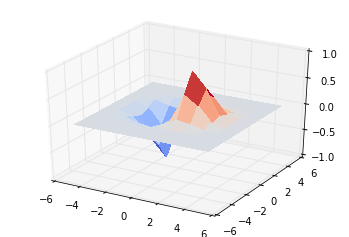

In [16]:
dx_g2d = sp.signal.convolve(g2d_kernel, np.array([[-1,0,1]]),mode='same')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xc, yc, dx_g2d, rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=False)

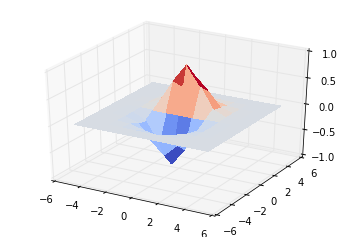

In [17]:
dy_g2d = sp.signal.convolve(g2d_kernel, np.transpose(np.array([[-1,0,1]])),mode='same')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xc, yc, dy_g2d,rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=False)